In [1]:
import seaborn as sns             # Gráficos
import matplotlib.pyplot as plt   # Gráficos
import pandas as pd               # Cria e realiza as operações de DataFrames
import numpy as np                # Módulo padrão no ramo estatístico
import pandas_datareader.data as web  
from statsmodels.tsa.seasonal import seasonal_decompose

import yfinance as yf
yf.pdr_override()

In [2]:
ticket = yf.Ticker('BTC-USD')
aux = ticket.history(interval="1d", start="2019-01-01", end="2022-10-31")
aux

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,4324200990,0,0
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,5244856836,0,0
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,4530215219,0,0
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,4847965467,0,0
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,5137609824,0,0
...,...,...,...,...,...,...,...
2022-10-26,20092.236328,20938.134766,20076.117188,20770.441406,58895950537,0,0
2022-10-27,20772.802734,20854.044922,20255.373047,20285.835938,49625110402,0,0
2022-10-28,20287.957031,20724.980469,20086.068359,20595.351562,43994715910,0,0


In [3]:
ticket_sp = yf.Ticker('^GSPC')
aux_sp = ticket_sp.history(interval="1d", start="2019-01-01", end="2022-10-31")
aux_sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,0,0
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000,0,0
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4213410000,0,0
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4104710000,0,0
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,4083030000,0,0
...,...,...,...,...,...,...,...
2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,4747930000,0,0
2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,4843120000,0,0
2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,4817310000,0,0


In [4]:
sujos_aux = aux['Volume']==0
aux = aux[~sujos_aux]
aux

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,4324200990,0,0
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,5244856836,0,0
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,4530215219,0,0
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,4847965467,0,0
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,5137609824,0,0
...,...,...,...,...,...,...,...
2022-10-26,20092.236328,20938.134766,20076.117188,20770.441406,58895950537,0,0
2022-10-27,20772.802734,20854.044922,20255.373047,20285.835938,49625110402,0,0
2022-10-28,20287.957031,20724.980469,20086.068359,20595.351562,43994715910,0,0


In [5]:
aux_plot_sp = pd.DataFrame()

aux_plot_sp['Close'] = aux_sp['Close']
aux_plot_sp['DATA'] = pd.to_datetime(aux_sp.index, format="%m-%d-%Y")
aux_plot_sp.set_index('DATA').asfreq('d')
aux_plot_sp.drop('DATA', inplace=True, axis=1)
aux_plot_sp

,Close
Date,
2019-01-02,2510.030029
2019-01-03,2447.889893
2019-01-04,2531.939941
2019-01-07,2549.689941
2019-01-08,2574.409912
...,...
2022-10-24,3797.340088
2022-10-25,3859.110107
2022-10-26,3830.600098


In [6]:
aux_plot1 = pd.DataFrame()

aux_plot1['Close'] = aux['Close']
aux_plot1['DATA'] = pd.to_datetime(aux.index, format="%m-%d-%Y")
aux_plot1.set_index('DATA').asfreq('d')
aux_plot1.drop('DATA', inplace=True, axis=1)
aux_plot1

,Close
Date,
2019-01-01,3843.520020
2019-01-02,3943.409424
2019-01-03,3836.741211
2019-01-04,3857.717529
2019-01-05,3845.194580
...,...
2022-10-26,20770.441406
2022-10-27,20285.835938
2022-10-28,20595.351562


In [7]:
obs = aux_plot_sp.asfreq('d')
for i in range(len(obs)):
    if np.isnan(obs['Close'][i]):
        obs['Close'][i] = obs['Close'][i-1]
obs

,Close
Date,
2019-01-02,2510.030029
2019-01-03,2447.889893
2019-01-04,2531.939941
2019-01-05,2531.939941
2019-01-06,2531.939941
...,...
2022-10-24,3797.340088
2022-10-25,3859.110107
2022-10-26,3830.600098


In [8]:
result_sp = seasonal_decompose(obs, model="additive")

In [9]:
result = seasonal_decompose(aux_plot1.asfreq('d'), model="additive")

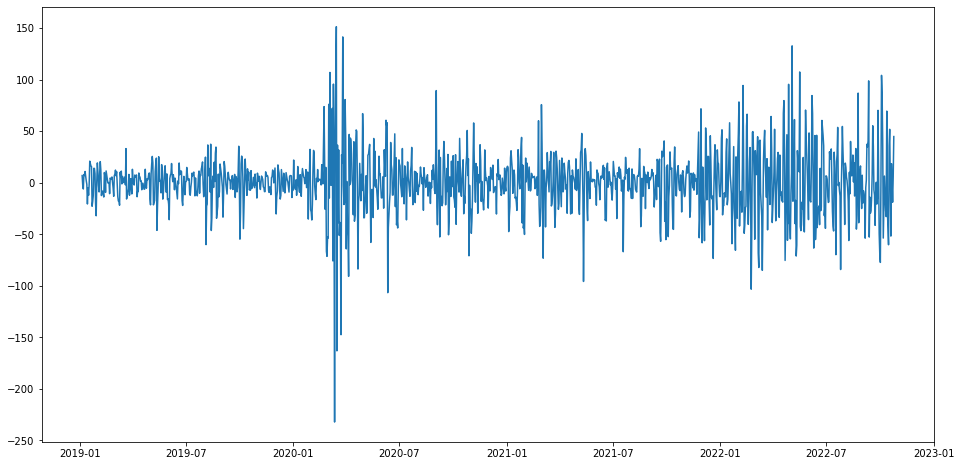

In [10]:
plt.figure(figsize=(16, 8)) 
display(plt.plot(result_sp.resid))

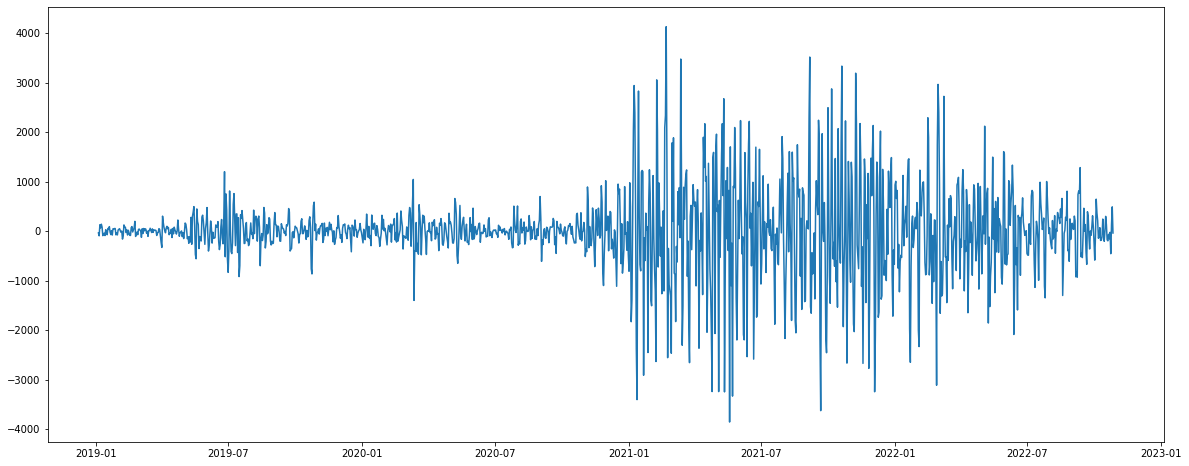

In [11]:
plt.figure(figsize=(20, 8)) 
display(plt.plot(result.resid)) 

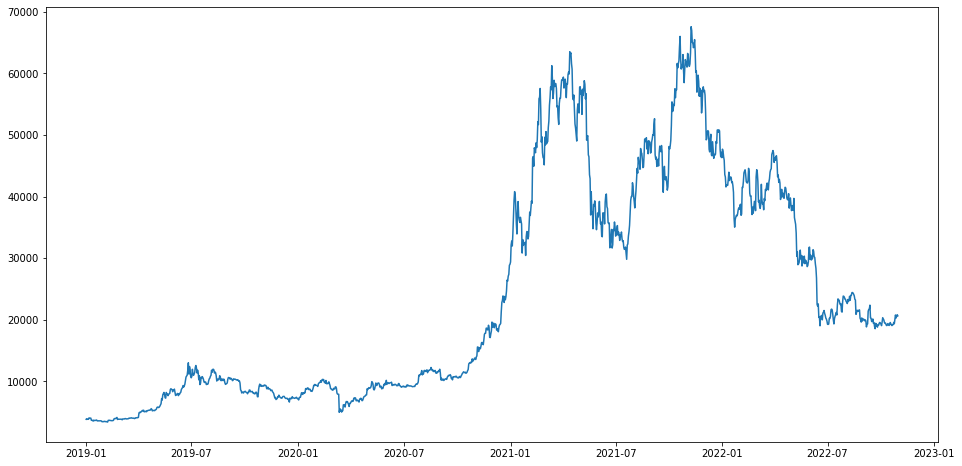

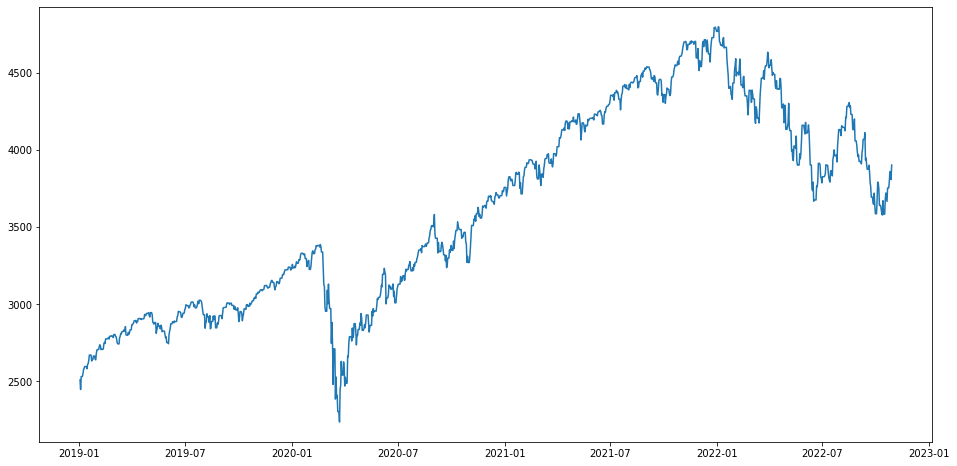

In [12]:
plt.figure(figsize=(16, 8)) 
display(plt.plot(result.observed)) 

plt.figure(figsize=(16, 8)) 
display(plt.plot(result_sp.observed)) 

<AxesSubplot:xlabel='Date'>

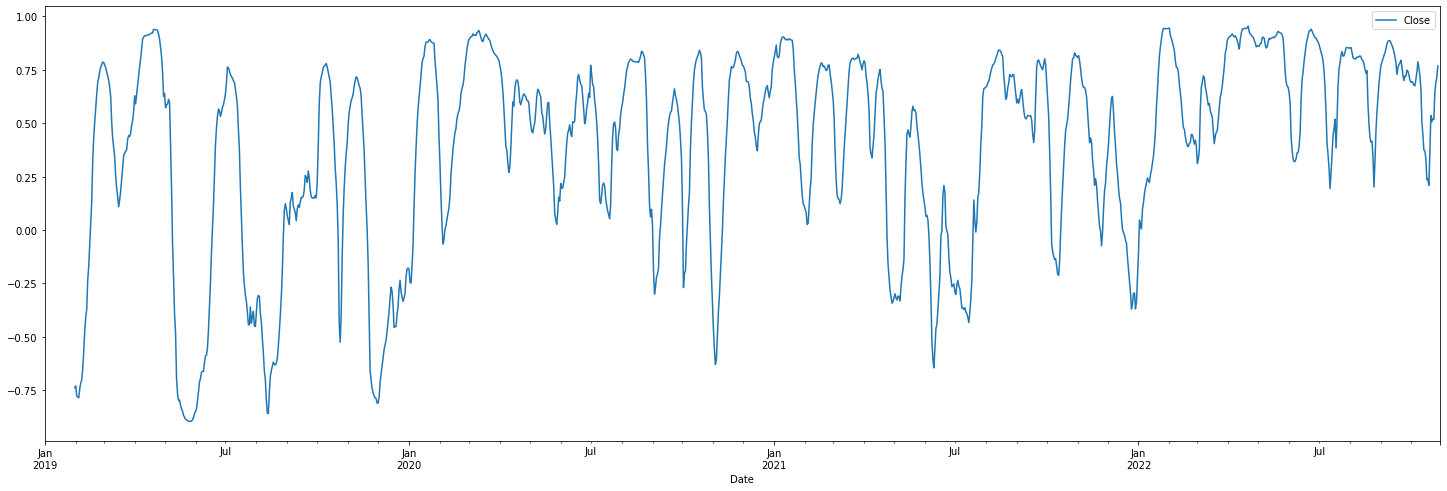

In [13]:
aux_plot1.rolling(30).corr(obs).plot(figsize = (25, 8))